In [2]:
import pandas as pd
import nltk 
from matplotlib import pyplot as plt
import numpy as np 
from _DevNLTKPatentPriorArtFinder import _DevNLTKPatentPriorArtFinder as p
csv ='https://raw.githubusercontent.com/GabeAspir/Patent-Prior-Art-Finder/main/resourcesZF/TenMorePatents.csv'
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
ppaf = p()
dataframe = ppaf.init(csv,'Publication_Number')
dataframe

,Publication_Number,Abstract,Description,Claim,Tokens,BagOfWords,TF-IDF
0,US-7636639-B2,"A remote sensor and associated data processor,...",FIELD OF THE INVENTION \n This invention rel...,"1. An apparatus, for measuring concentration, ...","[remote, sensor, associated, data, processor, ...","[6, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, ...","[0.2623857272180326, 0.0, 0.0, 0.0, 0.06613588..."
1,US-7657924-B2,"A method, system and computer program product ...",BACKGROUND OF INVENTION \n The present inv...,1. A method executable on a server for impleme...,"[method, system, computer, program, product, i...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0.0, 0.0, 0.1330861963711662, 0.0, 0.0, 0.0, ..."
2,US-5913778-A,A basketball mounting system for an in-ground ...,BACKGROUND OF THE INVENTION \n 1. Field of...,What is claimed is: \n \n 1. A mount...,"[basketball, mounting, system, inground, baske...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0861551203340..."
3,US-PP18508-P2,A new cultivar of Hydrangea plant named ‘RIE...,Genus: Hydrangea. Species: macrophylla. ...,1. A new and distinct cultivar of Hydrangea ...,"[new, cultivar, hydrangea, plant, named, rie, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.2156155220998839, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,US-PP21110-P2,A new and distinct cultivar of Phlox plant n...,Botanical designation: Phlox drummondii. \...,1. A new and distinct Phlox plant named ‘Sun...,"[new, distinct, cultivar, phlox, plant, named,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,US-PP25842-P3,A new and distinct Phalaenopsis plant named ...,Latin name of the genus and species of the pla...,What is claimed is: \n \n 1. A new a...,"[new, distinct, phalaenopsis, plant, named, ai...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,US-2001055999-A1,A basketball shooting practice return apparatu...,[0001] This patent application claims the bene...,I claim: \n \n 1 . A basketball s...,"[basketball, shooting, practice, return, appar...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.07031490769212724, 0.0, 0.0, 0.0, 0.0,..."
7,US-2015012562-A1,A literary recommendation engine is used to re...,TECHNICAL FIELD \n This document relates t...,What is claimed is: \n \n 1 . A me...,"[literary, recommendation, engine, used, recei...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.08767250412285094, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,US-9333726-B2,"A method for creating new educational, and the...",This application claims the priority of U.S. p...,The invention claimed is: \n \n 1. A...,"[method, creating, new, educational, theme, pa...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.07280856875713664, 0.0, 0.0, 0.110111005053..."
9,US-8109517-B2,A hand-held product for playing a game is disc...,FIELD OF THE INVENTION \n This invention r...,1. A hand-held game consisting of:\n a. a bask...,"[handheld, product, playing, game, disclosed, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08384868..."


In [29]:
cs_table =ppaf.cosineTable(dataframe) 
cs_table


,US-7636639-B2,US-7657924-B2,US-5913778-A,US-PP18508-P2,US-PP21110-P2,US-PP25842-P3,US-2001055999-A1,US-2015012562-A1,US-9333726-B2,US-8109517-B2
US-7636639-B2,1.000000,0.076807,0.015400,0.113735,0.000000,0.010199,0.016405,0.055446,0.054235,0.004986
US-7657924-B2,0.076807,1.000000,0.119701,0.000000,0.000000,0.039637,0.000000,0.046176,0.026348,0.019377
US-5913778-A,0.015400,0.119701,1.000000,0.000000,0.000000,0.026491,0.154461,0.010287,0.000000,0.110079
US-PP18508-P2,0.113735,0.000000,0.000000,1.000000,0.279145,0.146735,0.000000,0.037987,0.097538,0.000000
US-PP21110-P2,0.000000,0.000000,0.000000,0.279145,1.000000,0.200250,0.010066,0.000000,0.033278,0.000000
US-PP25842-P3,0.010199,0.039637,0.026491,0.146735,0.200250,1.000000,0.000000,0.020438,0.034986,0.038595
US-2001055999-A1,0.016405,0.000000,0.154461,0.000000,0.010066,0.000000,1.000000,0.000000,0.000000,0.191412
US-2015012562-A1,0.055446,0.046176,0.010287,0.037987,0.000000,0.020438,0.000000,1.000000,0.013586,0.039966
US-9333726-B2,0.054235,0.026348,0.000000,0.097538,0.033278,0.034986,0.000000,0.013586,1.000000,0.000000
US-8109517-B2,0.004986,0.019377,0.110079,0.000000,0.000000,0.038595,0.191412,0.039966,0.000000,1.000000


In [5]:
def get_sim(x, y):
  a = x
  b = y
  value= cs_table.iloc[a,b]
  return value




In [6]:
def multiply(x,y):
  return x+y

test = get_sim(0,1)
test



0.07680727159644626

In [7]:
size = len(cs_table)
for x in range(0, (size//2)):
  for y in range(size//2,size):
    print(x, y, get_sim(x,y))

0 5 0.010198773365304996
0 6 0.01640460582954802
0 7 0.0554456532608717
0 8 0.05423510693413107
0 9 0.004985872601384405
1 5 0.0396370017644709
1 6 0.0
1 7 0.046175709653961006
1 8 0.0263477399713271
1 9 0.019377334314614487
2 5 0.02649064714130088
2 6 0.15446085597447917
2 7 0.010286889997472792
2 8 0.0
2 9 0.11007906440048995
3 5 0.14673479641335554
3 6 0.0
3 7 0.03798685881987931
3 8 0.09753841331435327
3 9 0.0
4 5 0.20025046972870358
4 6 0.010065640694646235
4 7 0.0
4 8 0.03327791628198609
4 9 0.0


<bound method Axes3D.scatter of <matplotlib.axes._subplots.Axes3DSubplot object at 0x7f77ddb7e890>>

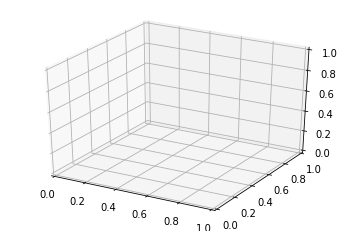

In [8]:
ax = plt.axes(projection='3d')
ax.scatter3D


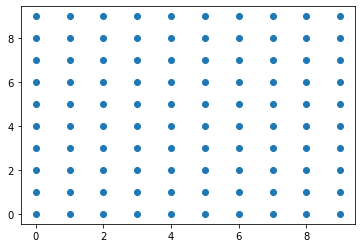

In [9]:
x_values = np.linspace(0,size-1,size)
y_values = np.linspace(0,size-1,size)

X, Y = np.meshgrid(x_values, y_values)
plt.scatter(X, Y)


In [37]:
def fix_table(table):

  for x in range(0, len(table)):
    if x is not len(table)-1:
      table.iloc[x, x] = table.iloc[x, x+1]
    else:
      table.iloc[x, x] = table.iloc[x, x-1]

fix_table(cs_table)
cs_table

,US-7636639-B2,US-7657924-B2,US-5913778-A,US-PP18508-P2,US-PP21110-P2,US-PP25842-P3,US-2001055999-A1,US-2015012562-A1,US-9333726-B2,US-8109517-B2
US-7636639-B2,0.076807,0.076807,0.015400,0.113735,0.000000,0.010199,0.016405,0.055446,0.054235,0.004986
US-7657924-B2,0.076807,0.119701,0.119701,0.000000,0.000000,0.039637,0.000000,0.046176,0.026348,0.019377
US-5913778-A,0.015400,0.119701,0.000000,0.000000,0.000000,0.026491,0.154461,0.010287,0.000000,0.110079
US-PP18508-P2,0.113735,0.000000,0.000000,0.279145,0.279145,0.146735,0.000000,0.037987,0.097538,0.000000
US-PP21110-P2,0.000000,0.000000,0.000000,0.279145,0.200250,0.200250,0.010066,0.000000,0.033278,0.000000
US-PP25842-P3,0.010199,0.039637,0.026491,0.146735,0.200250,0.000000,0.000000,0.020438,0.034986,0.038595
US-2001055999-A1,0.016405,0.000000,0.154461,0.000000,0.010066,0.000000,0.000000,0.000000,0.000000,0.191412
US-2015012562-A1,0.055446,0.046176,0.010287,0.037987,0.000000,0.020438,0.000000,0.013586,0.013586,0.039966
US-9333726-B2,0.054235,0.026348,0.000000,0.097538,0.033278,0.034986,0.000000,0.013586,0.000000,0.000000
US-8109517-B2,0.004986,0.019377,0.110079,0.000000,0.000000,0.038595,0.191412,0.039966,0.000000,0.000000


In [32]:
Z = cs_table.values
Z

array([[0.07680727, 0.07680727, 0.01539981, 0.11373513, 0.        ,
        0.01019877, 0.01640461, 0.05544565, 0.05423511, 0.00498587],
       [0.07680727, 0.11970112, 0.11970112, 0.        , 0.        ,
        0.039637  , 0.        , 0.04617571, 0.02634774, 0.01937733],
       [0.01539981, 0.11970112, 0.        , 0.        , 0.        ,
        0.02649065, 0.15446086, 0.01028689, 0.        , 0.11007906],
       [0.11373513, 0.        , 0.        , 0.27914526, 0.27914526,
        0.1467348 , 0.        , 0.03798686, 0.09753841, 0.        ],
       [0.        , 0.        , 0.        , 0.27914526, 0.20025047,
        0.20025047, 0.01006564, 0.        , 0.03327792, 0.        ],
       [0.01019877, 0.039637  , 0.02649065, 0.1467348 , 0.20025047,
        0.        , 0.        , 0.02043798, 0.03498557, 0.03859499],
       [0.01640461, 0.        , 0.15446086, 0.        , 0.01006564,
        0.        , 0.        , 0.        , 0.        , 0.19141203],
       [0.05544565, 0.04617571, 0.0102868

In [33]:
Z.shape

(10, 10)

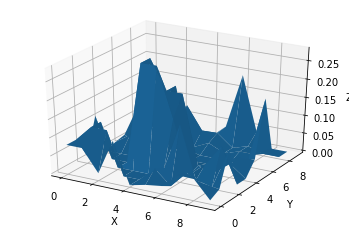

In [34]:
ax = plt.axes(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot_surface(X,Y,Z)


In [38]:
jaccard_table = ppaf.jaccardTable(dataframe)
fix_table(jaccard_table)
jaccard_table

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1738: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


,US-7636639-B2,US-7657924-B2,US-5913778-A,US-PP18508-P2,US-PP21110-P2,US-PP25842-P3,US-2001055999-A1,US-2015012562-A1,US-9333726-B2,US-8109517-B2
US-7636639-B2,0.035714,0.035714,0.007634,0.007812,0.000000,0.007634,0.020979,0.016393,0.021429,0.006803
US-7657924-B2,0.035714,0.058824,0.058824,0.000000,0.000000,0.018868,0.000000,0.045455,0.015625,0.014493
US-5913778-A,0.007634,0.058824,0.000000,0.000000,0.000000,0.029412,0.063291,0.016393,0.000000,0.048780
US-PP18508-P2,0.007812,0.000000,0.000000,0.176471,0.176471,0.098361,0.000000,0.017241,0.054054,0.000000
US-PP21110-P2,0.000000,0.000000,0.000000,0.176471,0.125000,0.125000,0.013158,0.000000,0.027778,0.000000
US-PP25842-P3,0.007634,0.018868,0.029412,0.098361,0.125000,0.000000,0.000000,0.016393,0.025316,0.023810
US-2001055999-A1,0.020979,0.000000,0.063291,0.000000,0.013158,0.000000,0.000000,0.000000,0.000000,0.063830
US-2015012562-A1,0.016393,0.045455,0.016393,0.017241,0.000000,0.016393,0.000000,0.013889,0.013889,0.012987
US-9333726-B2,0.021429,0.015625,0.000000,0.054054,0.027778,0.025316,0.000000,0.013889,0.000000,0.000000
US-8109517-B2,0.006803,0.014493,0.048780,0.000000,0.000000,0.023810,0.063830,0.012987,0.000000,0.000000


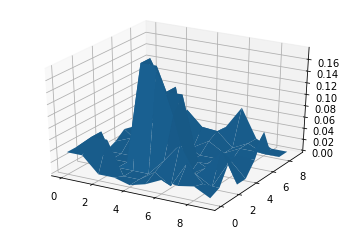

In [56]:
J = jaccard_table.values
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, J)




Both Jaccard and cosine on top of each other

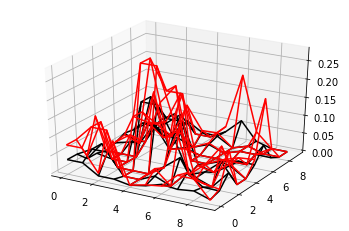

In [58]:
ax = plt.axes(projection='3d')
ax.plot_wireframe(X,Y,J, color ='black')
ax.plot_wireframe(X, Y, Z, color = 'red')


This data is exactly what would be expected. The cosine similarity (red) takes into account the frequqency of words, and therefore assigns a greater similarity to documents that are actually similair

In [63]:
tf_table = ppaf.cosineTableTF(dataframe)
fix_table(tf_table)
tf_table

T = tf_table.values
T

array([[0.05763812, 0.05763812, 0.00945517, 0.05657444, 0.        ,
        0.00634457, 0.01344237, 0.02934096, 0.02839459, 0.00306735],
       [0.05763812, 0.08122406, 0.08122406, 0.        , 0.        ,
        0.02018373, 0.        , 0.02818236, 0.01621152, 0.01612837],
       [0.00945517, 0.08122406, 0.        , 0.        , 0.        ,
        0.01479816, 0.11874162, 0.00499455, 0.        , 0.06915379],
       [0.05657444, 0.        , 0.        , 0.2074541 , 0.2074541 ,
        0.09208409, 0.        , 0.01890355, 0.0573445 , 0.        ],
       [0.        , 0.        , 0.        , 0.2074541 , 0.13474172,
        0.13474172, 0.0087102 , 0.        , 0.01650493, 0.        ],
       [0.00634457, 0.02018373, 0.01479816, 0.09208409, 0.13474172,
        0.        , 0.        , 0.01005426, 0.01669933, 0.02413139],
       [0.01344237, 0.        , 0.11874162, 0.        , 0.0087102 ,
        0.        , 0.        , 0.        , 0.        , 0.14864848],
       [0.02934096, 0.02818236, 0.0049945

Adding TF-IDF 

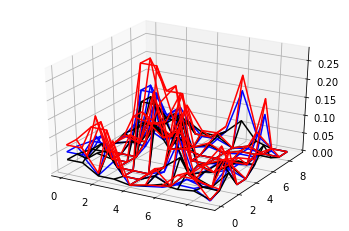

In [64]:
ax = plt.axes(projection='3d')
ax.plot_wireframe(X,Y,J, color ='black')
ax.plot_wireframe(X, Y, Z, color = 'red')
ax.plot_wireframe(X, Y, T, color = 'blue')

Because TF-IDF (blue) takes into account not only word frequency in individual documents, but also among the whole corpus, it makes sense that it dials back some of the similarity that cosine (red) assigned, but is still more than jaccard (black